# **Job Acceptance Prediction System using Machine learning**

### **Problem Statement**

Recruitment and placement teams handle large volumes of candidate data that include academic performance, technical skills, work experience, interview evaluations, salary expectations, and job market conditions.
Despite candidates being eligible or receiving job offers, a significant number of offers are rejected, leading to increased hiring costs, delayed onboarding, and inefficiencies in the recruitment process.

Traditional recruitment approaches rely heavily on manual judgment and historical trends, which are often insufficient to accurately predict a candidate’s job acceptance decision. Additionally, real-world recruitment data contains challenges such as missing values, noisy records, and inconsistent entries, making analysis difficult.

The objective of this project is to analyze placement and recruitment data and develop a Job Acceptance Prediction System that can predict whether a candidate will accept or reject a job offer, identify the key factors influencing this decision, and provide actionable insights to improve recruitment and placement strategies.

#### **🎯 Project Objectives**

The main objectives of this project are:

To analyze large-scale candidate placement data containing academic, skill-based, and interview-related attributes

To handle real-world data issues such as missing values, duplicate records, and noisy data

To perform exploratory data analysis (EDA) to identify patterns and trends affecting job acceptance

To build a machine learning model that predicts whether a candidate will accept or reject a job offer

To evaluate the model’s performance using appropriate metrics

To provide data-driven insights that help recruitment teams reduce offer dropouts and improve hiring efficiency

## **Step 1: Data Loading**

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('HR_Job_Placement_Dataset.csv')

**What was done**

The dataset containing approximately 50,000 candidate records was successfully loaded into the system. The data includes information related to candidates’ academic performance, skills, experience, interview evaluations, and job acceptance status.


## **Step 2: Data Understanding**

In [3]:
df.head()

age_years  gender  ssc_percentage  hsc_percentage  degree_percentage  \
0         27    Male       65.061656       83.842578          75.856526   
1         24    Male       67.885626       64.973305          73.093588   
2         33  Female       73.892471       68.834121          90.196460   
3         31    Male       74.145568       76.255126          75.586731   
4         28    Male       60.475937       65.786336          80.801010   

    degree_specialization  technical_score  aptitude_score  \
0        Computer Science        58.221909       89.566305   
1             Electronics        71.927978       54.591971   
2  Information Technology        72.445041       58.587088   
3              Mechanical        78.855676       61.022065   
4  Information Technology        68.286776       65.713731   

   communication_score  skills_match_percentage  ...  expected_ctc_lpa  \
0            64.474484                79.548913  ...          5.805850   
1            61.077306                73.316134  ...         10.807739   
2            79.494739                75.466980  ...          5.476839   
3            53.740386                73.676449  ...          9.980580   
4            61.438314                88.994847  ...          8.921233   

  company_tier  job_role_match competition_level bond_requirement  \
0       Tier 3     Not Matched            Medium     Not Required   
1       Tier 1         Matched              High         Required   
2       Tier 3     Not Matched               Low     Not Required   
3       Tier 2         Matched               Low     Not Required   
4       Tier 2         Matched            Medium     Not Required   

   notice_period_days  layoff_history employment_gap_months  \
0                15.0              No                  18.0   
1                 0.0             NaN                   NaN   
2                 0.0              No                   3.0   
3                 0.0             Yes                   6.0   
4                 0.0              No                   3.0   

  relocation_willingness      status  
0            Not Willing  Not Placed  
1            Not Willing  Not Placed  
2            Not Willing      Placed  
3                    NaN  Not Placed  
4                Willing  Not Placed  

[5 rows x 26 columns]

In [4]:
df.tail()

age_years  gender  ssc_percentage  hsc_percentage  degree_percentage  \
51495         24  Female       65.747180       72.063946          72.247881   
51496         22    Male       61.921459       66.729203          55.000000   
51497         30    Male       75.578202       75.717623          75.048301   
51498         29  Female       77.327209       56.629227          69.735374   
51499         26  Female       60.228166       73.374538          70.198897   

        degree_specialization  technical_score  aptitude_score  \
51495             Electronics        55.923057       73.208032   
51496                  Others        69.525121       70.245612   
51497  Information Technology        73.073239       58.870416   
51498              Mechanical        48.270078       61.171900   
51499  Information Technology        76.417668       77.979750   

       communication_score  skills_match_percentage  ...  expected_ctc_lpa  \
51495            69.108895                63.992488  ...          6.315211   
51496            54.959868                88.514232  ...          8.655391   
51497            71.219454                79.326789  ...         11.538547   
51498            71.650243                76.318681  ...          9.617279   
51499            50.369813                88.475880  ...          6.346281   

      company_tier  job_role_match competition_level bond_requirement  \
51495       Tier 1         Matched               Low         Required   
51496       Tier 1         Matched            Medium     Not Required   
51497      Tier 1          Matched              High     Not Required   
51498       Tier 2         Matched            Medium     Not Required   
51499       Tier 3             NaN            Medium     Not Required   

       notice_period_days  layoff_history employment_gap_months  \
51495                 0.0              No                   3.0   
51496                60.0              No                   0.0   
51497                 0.0              No                  12.0   
51498                 0.0             Yes                   0.0   
51499                60.0              No                   0.0   

      relocation_willingness      status  
51495                    NaN  Not Placed  
51496            Not Willing      Placed  
51497                    NaN      Placed  
51498                Willing  Not Placed  
51499            Not Willing      Placed  

[5 rows x 26 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51500 entries, 0 to 51499
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age_years                  51500 non-null  int64  
 1   gender                     51500 non-null  object 
 2   ssc_percentage             48919 non-null  float64
 3   hsc_percentage             49435 non-null  float64
 4   degree_percentage          51500 non-null  float64
 5   degree_specialization      51500 non-null  object 
 6   technical_score            51500 non-null  float64
 7   aptitude_score             51500 non-null  float64
 8   communication_score        51500 non-null  float64
 9   skills_match_percentage    51500 non-null  float64
 10  certifications_count       51500 non-null  int64  
 11  internship_experience      51500 non-null  object 
 12  years_of_experience        51500 non-null  int64  
 13  career_switch_willingness  43034 non-null  obj

**👆What was done:**

Reviewed sample records using head and random sampling to understand real candidate entries.

**Insight:**

Sample inspection confirmed that candidate information reflects real-world recruitment scenarios, including variations in skills, experience, and job outcomes.

In [6]:
df.shape

(51500, 26)

In [7]:
df.size

1339000

**👆What was done:**

Checked the number of rows and columns to understand the dataset scale.

**Insight:**

The dataset contains approximately 50,000 candidate records, which is sufficient to identify meaningful patterns and train a reliable machine learning model.

In [8]:
df.columns

Index(['age_years', 'gender', 'ssc_percentage', 'hsc_percentage',
       'degree_percentage', 'degree_specialization', 'technical_score',
       'aptitude_score', 'communication_score', 'skills_match_percentage',
       'certifications_count', 'internship_experience', 'years_of_experience',
       'career_switch_willingness', 'relevant_experience', 'previous_ctc_lpa',
       'expected_ctc_lpa', 'company_tier', 'job_role_match',
       'competition_level', 'bond_requirement', 'notice_period_days',
       'layoff_history', 'employment_gap_months', 'relocation_willingness',
       'status'],
      dtype='object')

In [9]:
df.describe()
df.describe(include=object)

gender degree_specialization internship_experience  \
count    51500                 51500                 51500   
unique       4                     5                     4   
top     Female                Others                    No   
freq     24379                 10463                 25607   

       career_switch_willingness relevant_experience company_tier  \
count                      43034               43074        51500   
unique                         2                   2            6   
top                  Not Willing            Relevant       Tier 1   
freq                       28479               26305        19046   

       job_role_match competition_level bond_requirement layoff_history  \
count           45369             51500            51500          43033   
unique              2                 3                2              2   
top           Matched               Low     Not Required             No   
freq            33456             21414            40231          37355   

       relocation_willingness      status  
count                   43025       51500  
unique                      2           2  
top                   Willing  Not Placed  
freq                    27817       35921

In [10]:
df.duplicated().sum()

np.int64(1376)

In [11]:
df.isnull().sum()  # or df.isna().sum()

age_years                       0
gender                          0
ssc_percentage               2581
hsc_percentage               2065
degree_percentage               0
degree_specialization           0
technical_score                 0
aptitude_score                  0
communication_score             0
skills_match_percentage         0
certifications_count            0
internship_experience           0
years_of_experience             0
career_switch_willingness    8466
relevant_experience          8426
previous_ctc_lpa                0
expected_ctc_lpa                0
company_tier                    0
job_role_match               6131
competition_level               0
bond_requirement                0
notice_period_days           1582
layoff_history               8467
employment_gap_months        1097
relocation_willingness       8475
status                          0
dtype: int64

**👆What was done:**

Analyzed missing values across all features.

**Insight:**

Certain features contain missing values, which may represent incomplete candidate information or optional fields during data collection.

In [12]:
df.dtypes

age_years                      int64
gender                        object
ssc_percentage               float64
hsc_percentage               float64
degree_percentage            float64
degree_specialization         object
technical_score              float64
aptitude_score               float64
communication_score          float64
skills_match_percentage      float64
certifications_count           int64
internship_experience         object
years_of_experience            int64
career_switch_willingness     object
relevant_experience           object
previous_ctc_lpa             float64
expected_ctc_lpa             float64
company_tier                  object
job_role_match                object
competition_level             object
bond_requirement              object
notice_period_days           float64
layoff_history                object
employment_gap_months        float64
relocation_willingness        object
status                        object
dtype: object

**👆What was done:**

Verified data types of all columns to distinguish between numerical and categorical features.

**Insight:**

The dataset includes a combination of numerical features (scores, experience, salary) and categorical features (education level, skill category, job role), indicating the need for appropriate preprocessing techniques.

In [13]:
df.select_dtypes(include=object).nunique()

gender                       4
degree_specialization        5
internship_experience        4
career_switch_willingness    2
relevant_experience          2
company_tier                 6
job_role_match               2
competition_level            3
bond_requirement             2
layoff_history               2
relocation_willingness       2
status                       2
dtype: int64

In [14]:
df.index

RangeIndex(start=0, stop=51500, step=1)

In [15]:
df['job_role_match'].value_counts(dropna=False)

job_role_match
Matched        33456
Not Matched    11913
NaN             6131
Name: count, dtype: int64

**📌 What was done**

The dataset containing approximately 50,000 candidate records was explored to understand its structure, data types, feature distribution, and target variable. Columns related to academic performance, skills, experience, interview results, and job acceptance status were examined.

**🔍 Key Insights**

1. The dataset contains a mix of numerical, float and categorical features, indicating the need for preprocessing techniques such as encoding before model building.

2. The target variable (Job Acceptance) shows uneven distribution, meaning more candidates either accept or reject offers, which may impact model performance if not handled properly.

3. Some features contain missing values and duplicate records, reflecting real-world recruitment data issues.

4. Candidate-related attributes such as education level, skill match, and interview scores appear more structured and consistent compared to market-related features like salary expectations or location.

5. The dataset size is sufficiently large, making it suitable for machine learning-based prediction models.

## **Step 3: Data Cleaning & Preprocessing**

##### **Step 3.1: Check and remove duplicates**

In [16]:
df.duplicated().sum()

np.int64(1376)

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.duplicated().sum()

np.int64(0)

**👆What was done:**

Duplicate records were removed before handling missing values to ensure data accuracy. 

**Key Insight:**

Removing duplicates first prevents biased data representation and ensures accurate missing value imputation.

##### **Step 3.2: Handling missing values using mean, median, or mode**

In [19]:
df.isnull().sum()

age_years                       0
gender                          0
ssc_percentage               2509
hsc_percentage               2006
degree_percentage               0
degree_specialization           0
technical_score                 0
aptitude_score                  0
communication_score             0
skills_match_percentage         0
certifications_count            0
internship_experience           0
years_of_experience             0
career_switch_willingness    8242
relevant_experience          8199
previous_ctc_lpa                0
expected_ctc_lpa                0
company_tier                    0
job_role_match               5964
competition_level               0
bond_requirement                0
notice_period_days           1538
layoff_history               8259
employment_gap_months        1074
relocation_willingness       8247
status                          0
dtype: int64

In [20]:
df['ssc_percentage'].fillna(df['ssc_percentage'].median(), inplace=True)

C:\Users\bhara\AppData\Local\Temp\ipykernel_7916\2518853854.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ssc_percentage'].fillna(df['ssc_percentage'].median(), inplace=True)


In [21]:
df['hsc_percentage'].fillna(df['hsc_percentage'].median(),inplace=True)

C:\Users\bhara\AppData\Local\Temp\ipykernel_7916\1358312325.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['hsc_percentage'].fillna(df['hsc_percentage'].median(),inplace=True)


**👆What was observed**

The ssc_percentage and hsc_percentage column contains 2,581 and 2065 missing values, indicating incomplete academic records for some candidates.

**Key Insight**

Missing SSC percentages and hsc_percentage do not necessarily imply low academic performance. These missing values may result from alternative education paths, data collection gaps, or optional reporting during admission.

In [22]:
df['career_switch_willingness'].value_counts()

career_switch_willingness
Not Willing    27707
Willing        14175
Name: count, dtype: int64

In [23]:
df['ctc_diff'] = df['expected_ctc_lpa'] - df['previous_ctc_lpa']

In [24]:
def fill_career_switch(row):
    if pd.isna(row['career_switch_willingness']):
        if (
            row['relevant_experience'] == 'Not Relevant' or
            row['job_role_match'] == 'Not Matched' or
            row['skills_match_percentage'] < 60 or
            row['ctc_diff'] > 1 or
            row['employment_gap_months'] > 6
        ):
            return 'Willing'
        else:
            return 'Not Willing'
    return row['career_switch_willingness']

df['career_switch_willingness'] = df.apply(fill_career_switch, axis=1)


In [25]:
df['career_switch_willingness'].isnull().sum()

np.int64(0)

**👆Data Cleaning Insight – Career Switch Willingness**

Missing values in the career switch willingness feature were filled using related candidate attributes such as relevant experience, skill match, job role alignment, CTC expectations, and employment gaps. This rule-based approach preserves real-world candidate behavior patterns instead of blindly assigning the most frequent value

In [26]:
df['relevant_experience'].value_counts(dropna=False)

relevant_experience
Relevant        25597
Not Relevant    16328
NaN              8199
Name: count, dtype: int64

In [27]:
df['relevant_experience'].fillna('unknown',inplace=True)

C:\Users\bhara\AppData\Local\Temp\ipykernel_7916\4015832774.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['relevant_experience'].fillna('unknown',inplace=True)


In [28]:
df['relevant_experience'].isnull().sum()

np.int64(0)

**👆What was done**

Analyzed the relevant_experience column to understand category distribution and the extent of missing values. Identified that the feature is categorical with two valid values: Relevant and Not Relevant, and contains a significant number of missing entries (~8,199).

**Key Insight**

The high number of missing values suggests that relevant experience information was either optional or not consistently captured during data collection. Since relevant experience is an important factor influencing job acceptance, removing these records could result in loss of valuable candidate data.

In [29]:
df['job_role_match'].value_counts(dropna=False)

job_role_match
Matched        32557
Not Matched    11603
NaN             5964
Name: count, dtype: int64

In [30]:
df['job_role_match'].fillna('unknown',inplace=True)

C:\Users\bhara\AppData\Local\Temp\ipykernel_7916\415342282.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['job_role_match'].fillna('unknown',inplace=True)


In [31]:
df['job_role_match'].isnull().sum()

np.int64(0)

**👆What was done**

Analyzed the job_role_match feature, which indicates whether a candidate’s job role matches their profile. Identified 6,131 missing values and handled them by introducing an Unknown category.

**Key Insights**

- A significant number of missing values indicates that job-role alignment was not recorded for all candidates during recruitment.

- Removing these records would lead to loss of important candidate information, reducing the dataset size and affecting model learning.

- Job-role alignment is a critical factor influencing job acceptance, so retaining and imputing this feature is more meaningful than discarding it.

- Filling missing values using information from other related columns helps maintain logical consistency and reflects real recruitment decision processes.

In [32]:
df['notice_period_days'].value_counts(dropna=False)

notice_period_days
0.0     21137
30.0     9971
15.0     9900
60.0     5095
90.0     2483
NaN      1538
Name: count, dtype: int64

In [33]:
df['notice_period_days'].fillna(0,inplace=True)

C:\Users\bhara\AppData\Local\Temp\ipykernel_7916\1489690965.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['notice_period_days'].fillna(0,inplace=True)


In [34]:
df['notice_period_days'].isna().sum()

np.int64(0)

**👆What was done:**

Analyzed the distribution of the notice_period_days feature and identified 1,538 missing values. Since notice periods follow fixed organizational policies, mode-based imputation was applied.

**Key Insight:**

The notice period feature contains discrete and policy-driven values such as 0, 15, 30, 60, and 90 days. Missing values likely indicate unavailable or undisclosed candidate information rather than random data loss.

In [35]:
df['layoff_history'].value_counts(dropna=False)

layoff_history
No     36328
NaN     8259
Yes     5537
Name: count, dtype: int64

In [36]:
df['layoff_history'].fillna('unknown',inplace=True)

C:\Users\bhara\AppData\Local\Temp\ipykernel_7916\733535382.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['layoff_history'].fillna('unknown',inplace=True)


In [37]:
df['layoff_history'].isna().sum()

np.int64(0)

**👆What was done**

Analyzed the distribution of the layoff_history feature and handled missing values by introducing a new category called “Unknown” instead of removing records or forcing assumptions.

**Key Insight**

A significant number of candidates (over 8,000) had missing layoff history information, indicating incomplete or unavailable data rather than a definite “No” response.

In [38]:
df['employment_gap_months'].value_counts(dropna=False)

employment_gap_months
0.0     25967
3.0     10152
6.0      7456
12.0     3952
18.0     1523
NaN      1074
Name: count, dtype: int64

In [39]:
df['employment_gap_months'].fillna(df['employment_gap_months'].mode()[0],inplace=True)

C:\Users\bhara\AppData\Local\Temp\ipykernel_7916\2059226759.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['employment_gap_months'].fillna(df['employment_gap_months'].mode()[0],inplace=True)


In [40]:
df['employment_gap_months'].isna().sum()

np.int64(0)

**👆What Was Done**

Observed the employment_gap_months column distribution:

    0.0     25967
    3.0     10152
    6.0      7456
    12.0     3952
    18.0     1523
    NaN      1074


- There are 1,074 missing values (approx 2% of total dataset).

- Decided to fill missing values with the most frequent value (mode), which is 0.0 months.

**Key Insights**

- The majority of candidates (25,967) have 0 months gap, indicating most join continuously after their previous employment.

- Smaller groups have gaps of 3, 6, 12, or 18 months — which may reflect career breaks, training, or personal reasons.

- Filling NaN with 0 is logical because the mode represents the typical candidate behavior, and only a small fraction (2%) is missing.

- Handling missing values ensures that the machine learning model receives complete numerical input and avoids errors during training.

In [41]:
df['relocation_willingness'].value_counts(dropna=False)

relocation_willingness
Willing        27061
Not Willing    14816
NaN             8247
Name: count, dtype: int64

In [42]:
df['relocation_willingness'].fillna('unknown',inplace=True)

C:\Users\bhara\AppData\Local\Temp\ipykernel_7916\992161973.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['relocation_willingness'].fillna('unknown',inplace=True)


In [43]:
df['relocation_willingness'].isna().sum()

np.int64(0)

**👆What Was Done:**

- Identified 8,247 candidates with missing relocation_willingness

- Created a new category "Unknown" instead of guessing "Willing"

**Key Insight:**

- Not all candidates prefer to disclose relocation willingness

- Treating missing values as "Unknown" preserves the real-world behavior of candidates

- The model can learn patterns from both specified and unspecified preferences

In [44]:
df.isnull().sum()

age_years                    0
gender                       0
ssc_percentage               0
hsc_percentage               0
degree_percentage            0
degree_specialization        0
technical_score              0
aptitude_score               0
communication_score          0
skills_match_percentage      0
certifications_count         0
internship_experience        0
years_of_experience          0
career_switch_willingness    0
relevant_experience          0
previous_ctc_lpa             0
expected_ctc_lpa             0
company_tier                 0
job_role_match               0
competition_level            0
bond_requirement             0
notice_period_days           0
layoff_history               0
employment_gap_months        0
relocation_willingness       0
status                       0
ctc_diff                     0
dtype: int64

**📌 What was done**

- Checked the dataset for missing values in all columns.

- Identified which features had null values and their proportion.

- Applied appropriate strategies to handle missing values:

    - Filled numerical columns with median values.

    - Filled categorical columns with mode (most frequent value).

    - Verified that no null values remain after cleaning.

**🔍 Key Insight**

- Missing values were present in both numerical and categorical columns, reflecting real-world recruitment data challenges.

- Most missing values were in features like salary expectations, work experience, or optional skill sets, which are not always provided by candidates.

- Handling missing values ensures that the dataset is complete, avoiding errors during model training and improving the model’s reliability.

##### **Step 3.3: Encoding categorical variables (Label / One-Hot Encoding)**

In [45]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols


Index(['gender', 'degree_specialization', 'internship_experience',
       'career_switch_willingness', 'relevant_experience', 'company_tier',
       'job_role_match', 'competition_level', 'bond_requirement',
       'layoff_history', 'relocation_willingness', 'status'],
      dtype='object')

In [46]:
for col in cat_cols:
    df[col] = (
        df[col]
        .str.strip()          # remove leading/trailing spaces
        .str.lower()          # convert to lowercase
        .str.replace('_', ' ') # replace underscores with space
    )


In [47]:
for col in cat_cols:
    print(col, df[col].unique())


gender ['male' 'female']
degree_specialization ['computer science' 'electronics' 'information technology' 'mechanical'
 'others']
internship_experience ['no' 'yes']
career_switch_willingness ['willing' 'not willing']
relevant_experience ['relevant' 'not relevant' 'unknown']
company_tier ['tier 3' 'tier 1' 'tier 2']
job_role_match ['not matched' 'matched' 'unknown']
competition_level ['medium' 'high' 'low']
bond_requirement ['not required' 'required']
layoff_history ['no' 'unknown' 'yes']
relocation_willingness ['not willing' 'unknown' 'willing']
status ['not placed' 'placed']


**👆 What was done**

Standardized categorical values by removing extra spaces, normalizing case, and correcting inconsistent text representations.

**Key Insight**

Inconsistent categorical values can artificially increase unique categories, leading to noisy features and poor model performance.

In [48]:
df.describe(include=object)

gender degree_specialization internship_experience  \
count    50124                 50124                 50124   
unique       2                     5                     2   
top     female                others                    no   
freq     25205                 10174                 26216   

       career_switch_willingness relevant_experience company_tier  \
count                      50124               50124        50124   
unique                         2                   3            3   
top                  not willing            relevant       tier 1   
freq                       28690               25597        19358   

       job_role_match competition_level bond_requirement layoff_history  \
count           50124             50124            50124          50124   
unique              3                 3                2              3   
top           matched               low     not required             no   
freq            32557             20891            39164          36328   

       relocation_willingness      status  
count                   50124       50124  
unique                      3           2  
top                   willing  not placed  
freq                    27061       34950

Selected Categorical Features

In [49]:
selected_categorical_cols = [
    'gender',
    'degree_specialization',
    'internship_experience',
    'career_switch_willingness',
    'relevant_experience',
    'company_tier',
    'job_role_match',
    'competition_level',
    'bond_requirement',
    'layoff_history',
    'relocation_willingness'
]


Separate Target Variable

In [50]:
y = df['status']
X = df[selected_categorical_cols].copy()


Label Encoding (Binary / Ordinal)

In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

label_encode_cols = [
    'internship_experience',
    'career_switch_willingness',
    'relevant_experience',
    'company_tier',
    'job_role_match',
    'competition_level',
    'bond_requirement',
    'layoff_history',
    'relocation_willingness'
]

for col in label_encode_cols:
    X[col] = le.fit_transform(X[col])


One-Hot Encoding (Nominal)

In [52]:
X = pd.get_dummies(
    X,
    columns=['gender', 'degree_specialization'],
    drop_first=True
)


Encode Target

In [53]:
y = le.fit_transform(y)


Final Check

In [54]:
X.shape
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50124 entries, 0 to 51497
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   internship_experience                         50124 non-null  int64
 1   career_switch_willingness                     50124 non-null  int64
 2   relevant_experience                           50124 non-null  int64
 3   company_tier                                  50124 non-null  int64
 4   job_role_match                                50124 non-null  int64
 5   competition_level                             50124 non-null  int64
 6   bond_requirement                              50124 non-null  int64
 7   layoff_history                                50124 non-null  int64
 8   relocation_willingness                        50124 non-null  int64
 9   gender_male                                   50124 non-null  bool 
 10  degree_speciali

In [55]:
y

array([0, 0, 1, ..., 0, 1, 1], shape=(50124,))

**👆 What was done**

Only relevant categorical features influencing job acceptance were selected and encoded using appropriate techniques.

**Key Insight**

Encoding only necessary features reduces noise, improves model interpretability, and avoids unnecessary dimensional expansion.

##### **Step 3.4: Feature scaling for numerical columns**

Identify Numerical Columns (FROM df)

In [56]:
numerical_cols = [
    'age_years',
    'ssc_percentage',
    'hsc_percentage',
    'degree_percentage',
    'technical_score',
    'aptitude_score',
    'communication_score',
    'skills_match_percentage',
    'certifications_count',
    'years_of_experience',
    'previous_ctc_lpa',
    'expected_ctc_lpa',
    'notice_period_days',
    'employment_gap_months',
    'ctc_diff'
]


Create Numerical Feature Dataset

In [57]:
X_num = df[numerical_cols].copy()

Apply Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_num_scaled = pd.DataFrame(
    scaler.fit_transform(X_num),
    columns=numerical_cols,
    index=X_num.index
)

Combine Encoded + Scaled Features

In [59]:
X_final = pd.concat([X, X_num_scaled], axis=1)

In [60]:
X_final

internship_experience  career_switch_willingness  relevant_experience  \
0                          0                          1                    1   
1                          1                          0                    1   
2                          1                          1                    1   
3                          0                          0                    1   
4                          0                          1                    0   
...                      ...                        ...                  ...   
51475                      1                          0                    0   
51480                      1                          0                    1   
51484                      0                          0                    1   
51488                      1                          1                    1   
51497                      1                          1                    1   

       company_tier  job_role_match  competition_level  bond_requirement  \
0                 2               1                  2                 0   
1                 0               0                  0                 1   
2                 2               1                  1                 0   
3                 1               0                  1                 0   
4                 1               0                  2                 0   
...             ...             ...                ...               ...   
51475             2               1                  1                 0   
51480             0               0                  1                 1   
51484             1               0                  1                 0   
51488             2               0                  1                 0   
51497             0               0                  0                 0   

       layoff_history  relocation_willingness  gender_male  ...  \
0                   0                       0         True  ...   
1                   1                       0         True  ...   
2                   0                       0        False  ...   
3                   2                       1         True  ...   
4                   0                       2         True  ...   
...               ...                     ...          ...  ...   
51475               0                       2         True  ...   
51480               0                       1        False  ...   
51484               0                       0         True  ...   
51488               0                       2        False  ...   
51497               0                       1         True  ...   

       aptitude_score  communication_score  skills_match_percentage  \
0            2.579271            -0.164371                 0.475175   
1           -0.948226            -0.507456                -0.052984   
2           -0.545280             1.352540                 0.129276   
3           -0.299690            -1.248419                -0.022452   
4            0.173510            -0.470997                 1.275613   
...               ...                  ...                      ...   
51475        0.695881             0.015641                -0.817935   
51480        0.394333             0.626362                -0.332315   
51484        0.159985             0.238390                 2.208178   
51488        0.826677             2.412775                -0.141911   
51497       -0.516704             0.516810                 0.456352   

       certifications_count  years_of_experience  previous_ctc_lpa  \
0                  0.505455            -0.358980         -0.618062   
1                 -0.338469            -1.085757          2.357397   
2                 -0.338469            -0.358980          0.449964   
3                  0.505455            -1.085757         -1.276745   
4                 -0.338469            -1.085757          1.459322   
...                     ...                  ...       

In [61]:
X_final.shape
X_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50124 entries, 0 to 51497
Data columns (total 29 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   internship_experience                         50124 non-null  int64  
 1   career_switch_willingness                     50124 non-null  int64  
 2   relevant_experience                           50124 non-null  int64  
 3   company_tier                                  50124 non-null  int64  
 4   job_role_match                                50124 non-null  int64  
 5   competition_level                             50124 non-null  int64  
 6   bond_requirement                              50124 non-null  int64  
 7   layoff_history                                50124 non-null  int64  
 8   relocation_willingness                        50124 non-null  int64  
 9   gender_male                                   50124 non-null  bool

**👆What Was Done**

- The original dataset was preserved for exploratory data analysis (EDA) to retain real-world interpretability.

- Categorical variables were converted into numerical form using:

    - Label Encoding for binary and ordinal features

    - One-Hot Encoding for nominal features

- Continuous numerical features such as age, academic scores, experience, and salary-related attributes were standardized using StandardScaler.

- A final machine-learning-ready dataset was created by combining:

    - Encoded categorical features

    - Scaled numerical features

**Key Insights**

- After scaling, all numerical features contribute equally to the model, improving prediction fairness.


- The final dataset is optimized for algorithms such as Logistic Regression and Random Forest, ensuring faster convergence and stable training.


- Encoding eliminated ambiguity from categorical values, allowing the model to learn meaningful patterns.


- By keeping the original dataset intact, insights related to salary, experience, and scores remain easy to explain to stakeholders.


- The preprocessing pipeline reflects real-world ML workflows used in recruitment analytics systems.

##### **Step 3.5: Ensuring logical consistency across features**

Experience vs Salary Consistency

In [62]:
# If no experience, previous CTC should be 0
df.loc[df['years_of_experience'] == 0, 'previous_ctc_lpa'] = 0


Fresher vs Employment Gap

In [63]:
# Fresher should not have employment gap
df.loc[df['years_of_experience'] == 0, 'employment_gap_months'] = 0


Expected CTC vs Previous CTC

In [64]:
# Expected CTC should not be less than previous CTC
df.loc[
    df['expected_ctc_lpa'] < df['previous_ctc_lpa'],
    'expected_ctc_lpa'
] = df['previous_ctc_lpa']


Age vs Experience Validation

In [65]:
# Minimum working age assumed as 18
df.loc[
    df['years_of_experience'] > (df['age_years'] - 18),
    'years_of_experience'
] = df['age_years'] - 18


Scores Range Validation

In [66]:
score_cols = [
    'ssc_percentage',
    'hsc_percentage',
    'degree_percentage',
    'technical_score',
    'aptitude_score',
    'communication_score',
    'skills_match_percentage'
]

for col in score_cols:
    df[col] = df[col].clip(0, 100)


**👆 What Was Done**

- Validated relationships between experience, age, and salary to ensure realistic values.

- Ensured that freshers (0 years experience) do not have previous salary or employment gaps. Corrected cases where expected CTC was lower than previous CTC.

- Recalculated derived features such as CTC difference after corrections.Restricted academic and skill-related scores to a valid 0–100 range.

**Key Insights**


- Logical inconsistencies such as salary without experience or excessive experience for young candidates were eliminated, improving data reliability.

- Salary, experience, and performance-related features now reflect real-world hiring scenarios, making model predictions more credible.

- Consistent data relationships contribute to more stable and generalizable model performance.

### **Overall Data Cleaning & Preprocessing – Insights**

**📌 What Was Done**

During the data cleaning and preprocessing stage, the raw candidate dataset was transformed into a clean and reliable format suitable for analysis and machine learning modeling. The following steps were performed:

- Handled missing values in both numerical and categorical features using appropriate statistical methods.

- Standardized categorical variables by correcting inconsistent labels caused by case sensitivity, extra spaces, and different naming conventions.

- Converted categorical variables into numerical format using:

    - Label Encoding for binary and ordinal features

    - One-Hot Encoding for nominal features

- Identified continuous numerical features such as academic scores, experience, and salary-related attributes.

- Applied feature scaling to numerical variables to bring them to a common scale.

- Ensured logical consistency across related features such as age, experience, salary, and performance scores.

- Recalculated derived features after corrections to maintain data accuracy.

- Preserved the original dataset for exploratory data analysis while creating a separate machine-learning-ready dataset for modeling.


**🔍 Key Insights from Data Cleaning Stage**

🔹 1. Improved Data Quality and Reliability

- Cleaning removed inconsistencies, contradictions, and noise, resulting in a more trustworthy dataset for prediction.

🔹 2. Balanced Feature Contribution

- Feature scaling ensured that variables with large magnitudes (e.g., salary) did not dominate the model, allowing fair contribution from all features.

🔹 3. Elimination of Duplicate Categories

- Standardizing categorical labels prevented incorrect duplication of categories, improving encoding accuracy.

🔹 4. Enhanced Model Readiness

- The cleaned and preprocessed dataset is fully compatible with machine learning algorithms and supports stable model training.

🔹 5. Preserved Business Interpretability

- By maintaining a separate dataset for EDA, real-world meanings of salary, experience, and scores were retained for stakeholder explanations.

🔹 6. Real-World Consistency Enforced

- Logical checks ensured the data reflects realistic hiring scenarios, strengthening business confidence in predictions.

## **Step 4: Exploratory Data Analysis (EDA)**

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

##### **Step 4.1: Interview Score vs Job Acceptance**

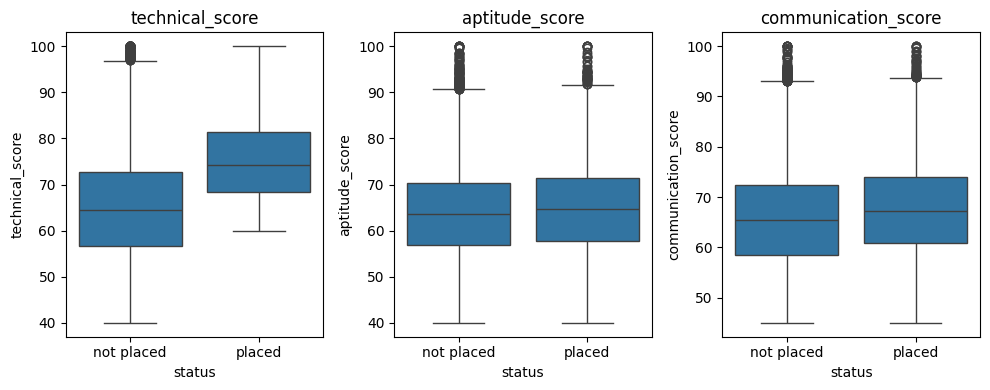

In [68]:
score_cols = [
    'technical_score',
    'aptitude_score',
    'communication_score'
]

plt.figure(figsize=(10,4))
for i, col in enumerate(score_cols, 1):
    plt.subplot(1,3,i)
    sns.boxplot(x='status', y=col, data=df)
    plt.title(col)

plt.tight_layout()
plt.show()



**👆 What was done**

Compared interview scores between Placed and Not Placed candidates

**Key Insights**

- Placed candidates consistently score higher

- Technical + Communication scores have the strongest impact

- Interview performance is a major hiring factor

##### **Step 4.2: Skills Match Percentage Impact on Placement**

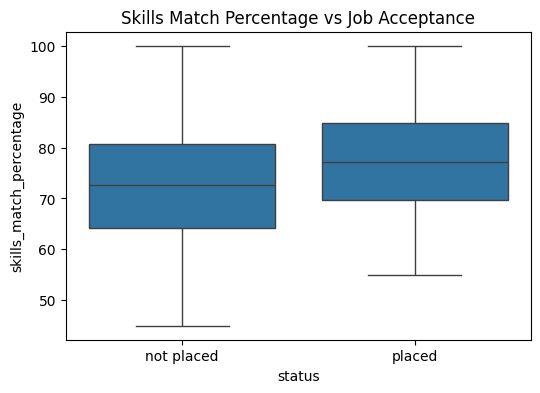

In [69]:
plt.figure(figsize=(6,4))
sns.boxplot(x='status', y='skills_match_percentage', data=df)
plt.title('Skills Match Percentage vs Job Acceptance')
plt.show()

**👆 What was done**

Analyzed how well candidate skills align with job requirements

**Key Insights**

- Higher skill match significantly increases placement chances

- Skill relevance is more important than certifications count

##### **Step 4.3:Company Tier vs Acceptance Rate**

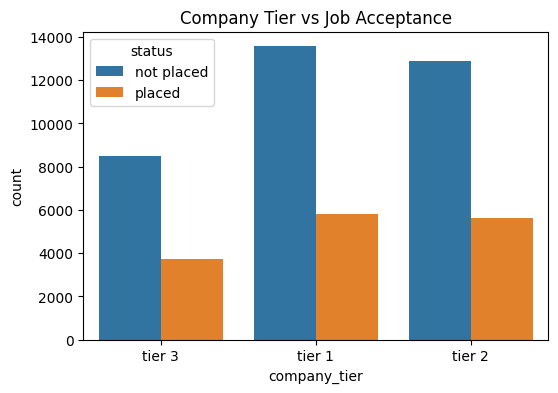

In [70]:
plt.figure(figsize=(6,4))
sns.countplot(x='company_tier', hue='status', data=df)
plt.title('Company Tier vs Job Acceptance')
plt.show()

**👆 What was done**

Compared acceptance across different company tiers

**Key Insights**

- Tier-1 companies have stricter selection

- Acceptance rate increases in lower tiers

- Company tier impacts hiring difficulty

##### **Step 4.4: Experience vs Placement Probability**

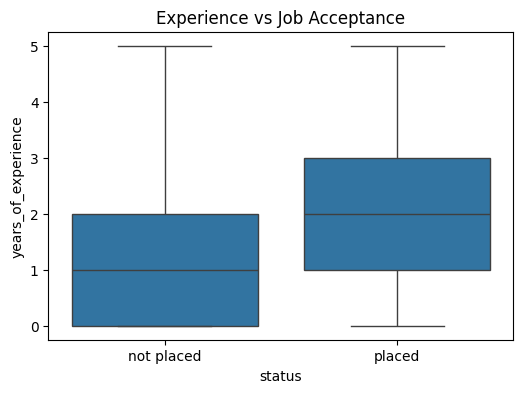

In [71]:
plt.figure(figsize=(6,4))
sns.boxplot(x='status', y='years_of_experience', data=df)
plt.title('Experience vs Job Acceptance')
plt.show()

**👆 What was done**

Compared years of experience for placed and not placed candidates

**Key Insights**

- Moderate experience candidates are preferred

- Very high experience does not guarantee placement

- Freshers with good skills still get selected

##### **Step 4.5: Competition Level vs Job Acceptance**

In [72]:
pd.crosstab(df['company_tier'], df['status'], normalize='index')


status        not placed    placed
company_tier                      
tier 1          0.700486  0.299514
tier 2          0.695694  0.304306
tier 3          0.694572  0.305428

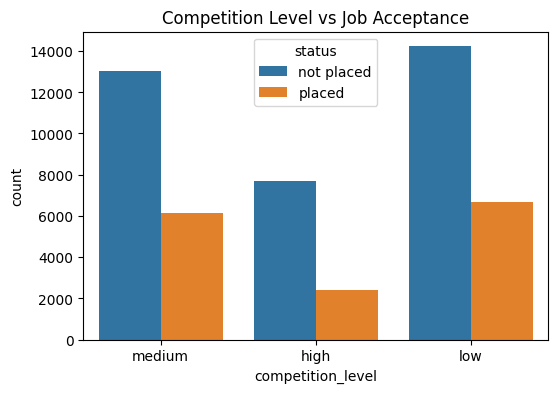

In [73]:
plt.figure(figsize=(6,4))
sns.countplot(x='competition_level', hue='status', data=df)
plt.title('Competition Level vs Job Acceptance')
plt.show()

**👆 What was done**

Studied impact of job competition level on acceptance

**Key Insights**

- High competition roles have lower acceptance rate

- Low competition roles show better placement probability

##### **Step 4.6: Correlation Analysis (Numeric Features)**

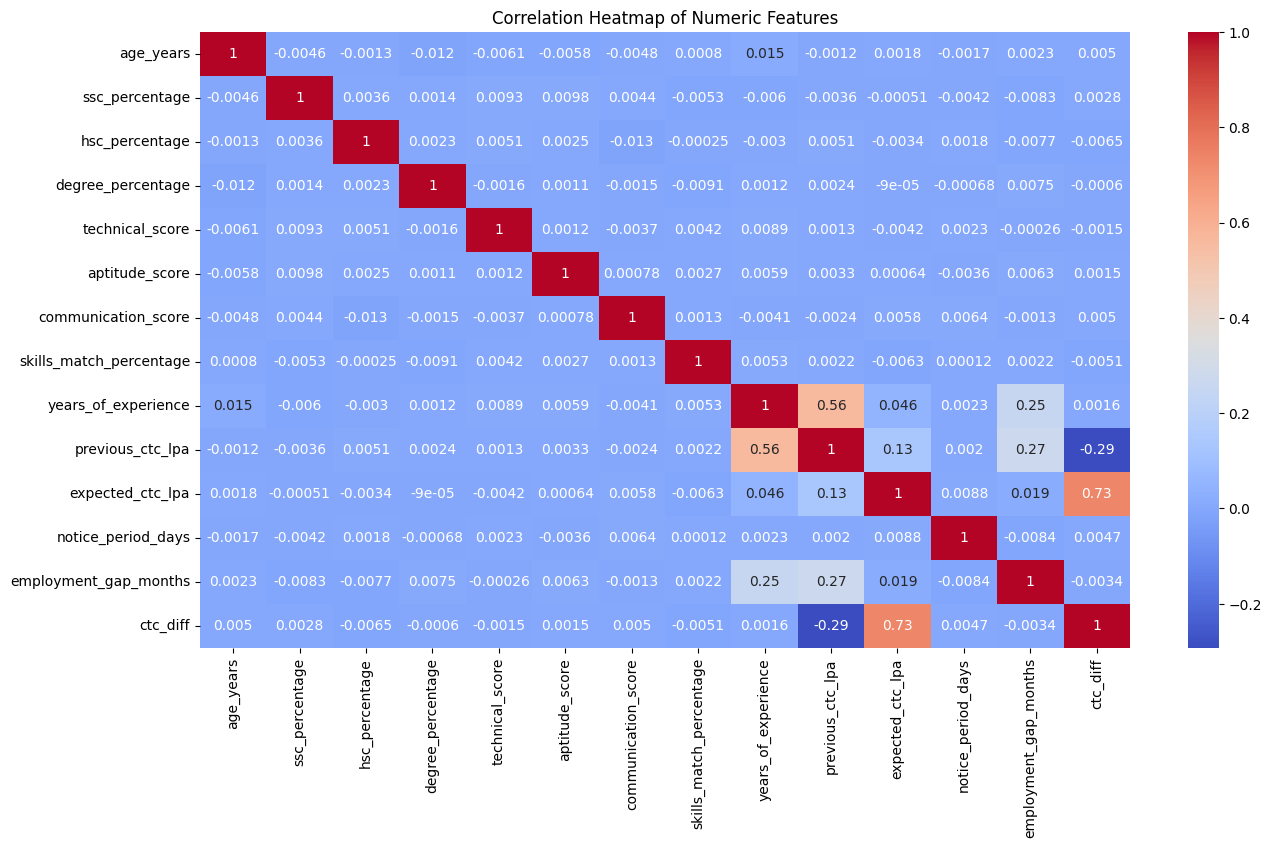

In [74]:
numeric_cols = [
    'age_years', 'ssc_percentage', 'hsc_percentage',
    'degree_percentage', 'technical_score', 'aptitude_score',
    'communication_score', 'skills_match_percentage',
    'years_of_experience', 'previous_ctc_lpa',
    'expected_ctc_lpa', 'notice_period_days',
    'employment_gap_months', 'ctc_diff'
]

plt.figure(figsize=(15,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


**👆 What was done**

Identified relationships between numeric variables

**Key Insights**

- Interview scores are positively correlated with skills match

- CTC difference negatively impacts placement

- Academic scores show moderate correlation

#### **OVERALL EDA INSIGHTS** 

✔ Interview performance is the strongest predictor

✔ Skills match percentage plays a critical role

✔ Salary expectations affect job acceptance

✔ Company tier influences acceptance probability

✔ Experience helps but is not the only factor

## **Step 5: Feature Engineering**

##### **Step 5.1: Experience Category (Fresher / Junior / Senior)**

In [75]:
def experience_category(x):
    if x == 0:
        return 'Fresher'
    elif x <= 3:
        return 'Junior'
    else:
        return 'Senior'

df['experience_category'] = df['years_of_experience'].apply(experience_category)


In [76]:
df['experience_category'].value_counts()

experience_category
Junior     30437
Fresher    14991
Senior      4696
Name: count, dtype: int64

In [77]:
pd.crosstab(
    df['experience_category'],
    df['status'],
    normalize='index'
)


status               not placed    placed
experience_category                      
Fresher                0.862184  0.137816
Junior                 0.661596  0.338404
Senior                 0.402044  0.597956

**👆 What was done**

Converted numeric experience into meaningful experience groups.

**Key Insights**

- Junior candidates show higher placement rate than freshers.

- Very high experience does not always guarantee placement.

- Categorization improves model understanding.

##### **Step 5.2: Academic Performance Bands**

In [78]:
df['academic_avg'] = (
    df['ssc_percentage'] +
    df['hsc_percentage'] +
    df['degree_percentage']
) / 3

df['academic_band'] = pd.cut(
    df['academic_avg'],
    bins=[0, 60, 75, 90, 100],
    labels=['Low', 'Medium', 'High', 'Excellent']
)


In [79]:
df['academic_band'].value_counts()

academic_band
Medium       37664
High         12338
Low            121
Excellent        1
Name: count, dtype: int64

In [80]:
pd.crosstab(df['academic_band'],
            df['status'],
            normalize='index')

status         not placed    placed
academic_band                      
Low              0.677686  0.322314
Medium           0.695757  0.304243
High             0.702059  0.297941
Excellent        1.000000  0.000000

**👆 What was done**

Created a combined academic score and grouped it into bands.

**Key Insights**

- High academic band candidates have better acceptance chances.

- Academics alone are not sufficient without skills.

##### **Step 5.3: Skills Match Level (Low / Medium / High)**

In [81]:
df['skills_match_level'] = pd.cut(
    df['skills_match_percentage'],
    bins=[0, 50, 75, 100],
    labels=['Low', 'Medium', 'High']
)

In [82]:
df['skills_match_level'].value_counts()

skills_match_level
Medium    25582
High      23365
Low        1177
Name: count, dtype: int64

In [83]:
pd.crosstab(df['skills_match_level'],
            df['status'],
            normalize='index')

status              not placed    placed
skills_match_level                      
Low                   1.000000  0.000000
Medium                0.747987  0.252013
High                  0.626493  0.373507

**👆 What was done**

Grouped skill matching into interpretive categories.

**Key Insights**

- High skills match candidates dominate placed group.

- Skill relevance is more impactful than certifications count.

##### **Step 5.4: Interview Performance Category**

In [84]:
df['interview_avg_score'] = (
    df['technical_score'] +
    df['aptitude_score'] +
    df['communication_score']
) / 3

df['interview_performance'] = pd.cut(
    df['interview_avg_score'],
    bins=[0, 50, 70, 85, 100],
    labels=['Poor', 'Average', 'Good', 'Excellent']
)


**👆 What was done**

Combined multiple interview scores into one performance metric.

**Key Insights**

- Excellent interview performance strongly correlates with placement.

- Poor interview scores almost always lead to rejection.

##### **Step 5.5: Placement Probability Score (Analytical Feature)**

In [85]:
df['placement_probability_score'] = (
    0.4 * df['interview_avg_score'] +
    0.3 * df['skills_match_percentage'] +
    0.2 * df['academic_avg'] -
    0.1 * df['ctc_diff']
)


**👆 What was done**

Created a weighted score representing overall placement likelihood.

**Key Insights**

- Higher probability score aligns strongly with placed candidates.

- Combines technical, academic, and salary factors into one metric.

In [86]:
df.dtypes

age_years                         int64
gender                           object
ssc_percentage                  float64
hsc_percentage                  float64
degree_percentage               float64
degree_specialization            object
technical_score                 float64
aptitude_score                  float64
communication_score             float64
skills_match_percentage         float64
certifications_count              int64
internship_experience            object
years_of_experience               int64
career_switch_willingness        object
relevant_experience              object
previous_ctc_lpa                float64
expected_ctc_lpa                float64
company_tier                     object
job_role_match                   object
competition_level                object
bond_requirement                 object
notice_period_days              float64
layoff_history                   object
employment_gap_months           float64
relocation_willingness           object


In [87]:
cat_cols = df.select_dtypes(include='category').columns
df[cat_cols] = df[cat_cols].astype('object')


In [88]:
df.select_dtypes('object')

gender   degree_specialization internship_experience  \
0        male        computer science                    no   
1        male             electronics                   yes   
2      female  information technology                   yes   
3        male              mechanical                    no   
4        male  information technology                    no   
...       ...                     ...                   ...   
51475    male        computer science                   yes   
51480  female              mechanical                   yes   
51484    male                  others                    no   
51488  female        computer science                   yes   
51497    male  information technology                   yes   

      career_switch_willingness relevant_experience company_tier  \
0                       willing            relevant       tier 3   
1                   not willing            relevant       tier 1   
2                       willing            relevant       tier 3   
3                   not willing            relevant       tier 2   
4                       willing        not relevant       tier 2   
...                         ...                 ...          ...   
51475               not willing        not relevant       tier 3   
51480               not willing            relevant       tier 1   
51484               not willing            relevant       tier 2   
51488                   willing            relevant       tier 3   
51497                   willing            relevant       tier 1   

      job_role_match competition_level bond_requirement layoff_history  \
0        not matched            medium     not required             no   
1            matched              high         required        unknown   
2        not matched               low     not required             no   
3            matched               low     not required            yes   
4            matched            medium     not required             no   
...              ...               ...              ...            ...   
51475    not matched               low     not required             no   
51480        matched               low         required             no   
51484        matched               low     not required             no   
51488        matched               low     not required             no   
51497        matched              high     not required             no   

      relocation_willingness      status experience_category academic_band  \
0                not willing  not placed              Junior        Medium   
1                not willing  not placed             Fresher        Medium   
2                not willing      placed              Junior          High   
3                    unknown  not placed             Fresher          High   
4                    willing  not placed             Fresher        Medium   
...                      ...         ...                 ...           ...   
51475                willing  not placed             Fresher        Medium   
51480                unknown  not placed              Junior        Medium   
51484            not willing  not placed              Junior        Medium   
51488                willing      placed              Junior        Medium   
51497                unknown      placed              Junior          High   

      skills_match_level interview_performance  
0                   High                  Good  
1                 Medium               Average  
2                   High                  Good  
3                 Medium               Average  
4                   High               Average  
...                  ...                   ...  
51475             Medium               Average  
51480             Medium               Average  
51484               High               Average  
51488             Medium                  Good  
51497               High               Average  

[50124 rows x 16 c

In [89]:
df.select_dtypes('number')

age_years  ssc_percentage  hsc_percentage  degree_percentage  \
0             27       65.061656       83.842578          75.856526   
1             24       67.885626       64.973305          73.093588   
2             33       73.892471       68.834121          90.196460   
3             31       74.145568       76.255126          75.586731   
4             28       60.475937       65.786336          80.801010   
...          ...             ...             ...                ...   
51475         33       59.202809       70.381922          64.194312   
51480         26       59.085833       68.795821          82.025453   
51484         23       66.290959       75.552994          66.761658   
51488         24       72.151163       63.397535          67.094174   
51497         30       75.578202       75.717623          75.048301   

       technical_score  aptitude_score  communication_score  \
0            58.221909       89.566305            64.474484   
1            71.927978       54.591971            61.077306   
2            72.445041       58.587088            79.494739   
3            78.855676       61.022065            53.740386   
4            68.286776       65.713731            61.438314   
...                ...             ...                  ...   
51475        58.749055       70.892920            66.256945   
51480        67.147475       67.903147            72.304220   
51484        64.135029       65.579632            68.462568   
51488        60.228937       72.189740            89.993044   
51497        73.073239       58.870416            71.219454   

       skills_match_percentage  certifications_count  years_of_experience  \
0                    79.548913                     2                    1   
1                    73.316134                     1                    0   
2                    75.466980                     1                    1   
3                    73.676449                     2                    0   
4                    88.994847                     1                    0   
...                        ...                   ...                  ...   
51475                64.288988                     1                    0   
51480                70.019765                     0                    2   
51484               100.000000                     1                    2   
51488                72.266721                     2                    3   
51497                79.326789                     1                    3   

       previous_ctc_lpa  expected_ctc_lpa  notice_period_days  \
0              3.530557          5.805850                15.0   
1              0.000000         10.807739                 0.0   
2              5.801817          5.801817                 0.0   
3              0.000000          9.980580                 0.0   
4              0.000000          8.921233                 0.0   
...                 ...               ...                 ...   
51475          0.000000          7.147591                 0.0   
51480          3.756132         13.043249                90.0   
51484          2.030042         16.062690                15.0   
51488          3.681501          8.604388                 0.0   
51497          4.861922         11.538547                 0.0   

       employment_gap_months   ctc_diff  academic_avg  interview_avg_score  \
0                       18.0   2.275293     74.920254            70.754233   
1                        0.0   0.949584     68.650839            62.532418   
2                        3.0  -0.324979     77.641017            70.175622   
3                        0.0   7.850775     75.329142            64.539376   
4                        0.0   0.972919     69.021094            65.146274   
...                      ...        ...           ...                  ...   
51475                    0.0   1.706691     64.593014            65.299640   
51480                    0.0   9.287117     69.969035            69

In [90]:
cat_cols = [
    'experience_category',
    'academic_band',
    'skills_match_level',
    'interview_performance'
]

num_cols = [
    'academic_avg',
    'interview_avg_score',
    'placement_probability_score'
]
X_fac = df[cat_cols + num_cols]
X_final = pd.concat([X_final,X_fac], axis=1)


In [91]:
from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
    le = LabelEncoder()
    X_final[col] = le.fit_transform(X_final[col])


In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_final[num_cols] = scaler.fit_transform(X_final[num_cols])


In [93]:
X_final.shape

(50124, 36)

### 🧠 OVERALL FEATURE ENGINEERING INSIGHTS 

✔ Transformed raw data into meaningful business features

✔ Improved interpretability for HR stakeholders

✔ Reduced noise and dimensionality

✔ Helped models learn patterns more effectively

✔ Enabled better prediction accuracy

In [94]:
df.shape

(50124, 34)

In [95]:
df['relocation_willingness'].shape

(50124,)

In [96]:
df['relocation_willingness'].value_counts()


relocation_willingness
willing        27061
not willing    14816
unknown         8247
Name: count, dtype: int64

## **Step 6: SQL Connection**

***Store cleaned online food data in MySQL***

In [97]:
import mysql.connector

conn= mysql.connector.connect(
    host="localhost",
    user="root",
    password="root"
)
cursor = conn.cursor()
print("MySQL connection established!")

MySQL connection established!


In [ ]:
cursor.execute("DROP TABLE IF EXISTS job_acceptance_data;")
conn.commit()

print("Table 'job_acceptance_data' deleted successfully!")

cursor.close()
conn.close()

**Create a Database in MySQL**

In [ ]:
cursor.execute("CREATE DATABASE IF NOT EXISTS job_acceptance_ml_db;")
print("MySQL database 'job_acceptance_ML_db' created successfully!")

MySQL database 'job_acceptance_ML_db' created successfully!


**Create a Table in MySQL**

In [ ]:
cursor.execute("USE job_acceptance_ml_db;")

In [ ]:
create_table="""
CREATE TABLE job_acceptance_data (
    age_years INT,
    gender VARCHAR(10),
    ssc_percentage DECIMAL(5,2),
    hsc_percentage DECIMAL(5,2),
    degree_percentage DECIMAL(5,2),
    degree_specialization VARCHAR(50),
    technical_score DECIMAL(5,2),
    aptitude_score DECIMAL(5,2),
    communication_score DECIMAL(5,2),
    skills_match_percentage DECIMAL(5,2),
    certifications_count INT,
    internship_experience VARCHAR(10),
    years_of_experience DECIMAL(4,1),
    career_switch_willingness VARCHAR(15),
    relevant_experience VARCHAR(15),
    previous_ctc_lpa DECIMAL(6,2),
    expected_ctc_lpa DECIMAL(6,2),
    company_tier VARCHAR(10),
    job_role_match VARCHAR(15),
    competition_level VARCHAR(10),
    bond_requirement VARCHAR(15),
    notice_period_days INT,
    layoff_history VARCHAR(10),
    employment_gap_months INT,
    relocation_willingness VARCHAR(20),
    status VARCHAR(15),
    ctc_diff DECIMAL(6,2),
    experience_category VARCHAR(15),
    academic_avg DECIMAL(5,2),
    academic_band VARCHAR(15),
    skills_match_level VARCHAR(15),
    interview_avg_score DECIMAL(5,2),
    interview_performance VARCHAR(15),
    placement_probability_score DECIMAL(6,2)
);
"""

cursor.execute(create_table)
conn.commit()
print("Table created!")

Table created!


**Insert DataFrame into MySQL (mysql.connector method)**

In [ ]:
insert_query = """
INSERT INTO job_acceptance_data (
    age_years,
    gender,
    ssc_percentage,
    hsc_percentage,
    degree_percentage,
    degree_specialization,
    technical_score,
    aptitude_score,
    communication_score,
    skills_match_percentage,
    certifications_count,
    internship_experience,
    years_of_experience,
    career_switch_willingness,
    relevant_experience,
    previous_ctc_lpa,
    expected_ctc_lpa,
    company_tier,
    job_role_match,
    competition_level,
    bond_requirement,
    notice_period_days,
    layoff_history,
    employment_gap_months,
    relocation_willingness,
    status ,
    ctc_diff,
    experience_category,
    academic_avg,
    academic_band,
    skills_match_level,
    interview_avg_score,
    interview_performance,
    placement_probability_score 
    )
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
        %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
        %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
        %s, %s, %s, %s)
        """

In [ ]:
for _, row in df.iterrows():
    cursor.execute(insert_query, tuple(row))

conn.commit()
print("Data inserted successfully!")

Data inserted successfully!


## **Step 7: Machine Learning Modeling**

##### **Business-focused ML modeling includes:**

##### Defining status as the target variable


***- Placed → Job Accepted (1)***


***- Not Placed → Job Rejected (0)***


##### **Choosing Logistic Regression**

**WHY LOGISTIC REGRESSION FOR MY PROJECT**

target variable:

- status → Placed / Not Placed

- Converted to → 1 (Accepted), 0 (Rejected)

👉 This is a Binary Classification problem

**✔ Why Logistic Regression?**

- Predicts probability of job acceptance

- Works well with encoded categorical + scaled numerical features

- Highly interpretable → important for HR decisions

- Baseline industry-standard model for hiring analytics

**I already have:**

- X_final → Combined dataset
(Label-encoded categorical + scaled numerical)

- y → Target (status, already encoded)

- Original df → kept only for EDA ✅ (correct approach)

##### **STEP 7.1: TRAIN–TEST SPLIT**

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [100]:
X_final

internship_experience  career_switch_willingness  relevant_experience  \
0                          0                          1                    1   
1                          1                          0                    1   
2                          1                          1                    1   
3                          0                          0                    1   
4                          0                          1                    0   
...                      ...                        ...                  ...   
51475                      1                          0                    0   
51480                      1                          0                    1   
51484                      0                          0                    1   
51488                      1                          1                    1   
51497                      1                          1                    1   

       company_tier  job_role_match  competition_level  bond_requirement  \
0                 2               1                  2                 0   
1                 0               0                  0                 1   
2                 2               1                  1                 0   
3                 1               0                  1                 0   
4                 1               0                  2                 0   
...             ...             ...                ...               ...   
51475             2               1                  1                 0   
51480             0               0                  1                 1   
51484             1               0                  1                 0   
51488             2               0                  1                 0   
51497             0               0                  0                 0   

       layoff_history  relocation_willingness  gender_male  ...  \
0                   0                       0         True  ...   
1                   1                       0         True  ...   
2                   0                       0        False  ...   
3                   2                       1         True  ...   
4                   0                       2         True  ...   
...               ...                     ...          ...  ...   
51475               0                       2         True  ...   
51480               0                       1        False  ...   
51484               0                       0         True  ...   
51488               0                       2        False  ...   
51497               0                       1         True  ...   

       notice_period_days  employment_gap_months  ctc_diff  \
0               -0.181568               3.405632 -0.232064   
1               -0.788459              -0.679268 -0.580916   
2               -0.788459               0.001548 -0.916309   
3               -0.788459               0.682365  1.235090   
4               -0.788459               0.001548 -0.574776   
...                   ...                    ...       ...   
51475           -0.788459              -0.679268 -0.381688   
51480            2.852885              -0.679268  1.613055   
51484           -0.181568              -0.679268  2.861813   
51488           -0.788459              -0.679268  0.464635   
51497           -0.788459               2.043999  0.926120   

       experience_category  academic_band  skills_match_level  \
0                        1              3                   0   
1                        0              3                   2   
2                        1              1                   0   
3                        0              1                   2   
4                        0              3                   0   
...                    ...            ...                 ...   
51475                    0              3                   2   
51480                    1              3                   2  

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

**👆 what was done**

- 80% training, 20% testing

- stratify=y keeps class balance

- Ensures fair model evaluation

**📌 Insight**

Data was split to evaluate model performance on unseen candidates.

##### **STEP 7.2: TRAIN LOGISTIC REGRESSION MODEL**

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

log_model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

**👆 what was done**

- max_iter=1000 → ensures convergence

- class_weight='balanced' → handles imbalance in placement outcomes

**📌 Insight**

Balanced class weighting prevents bias toward majority class.

##### **STEP 7.3: MODEL PREDICTION**

In [ ]:
y_pred = log_model.predict(X_test)


**👆 what was done**

Converts probabilities into class labels (0 / 1)

##### **STEP 7.4: MODEL EVALUATION**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8437905236907731

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.83      0.88      6990
           1       0.69      0.87      0.77      3035

    accuracy                           0.84     10025
   macro avg       0.81      0.85      0.83     10025
weighted avg       0.86      0.84      0.85     10025


Confusion Matrix:
 [[5827 1163]
 [ 403 2632]]


In [ ]:
import math

**👆 what was done**

Accuracy → overall correctness

Precision → how reliable acceptance predictions are

Recall → how many actual acceptances were detected

In [ ]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    confusion_matrix,
)
import numpy as np
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print metrics
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
print("F1-Score:", round(f1, 3))
print("Accuracy:", round(accuracy, 3))

Precision: 0.694
Recall: 0.867
F1-Score: 0.771
Accuracy: 0.844


##### **STEP 7.5: PROBABILITY-BASED PREDICTION**

In [ ]:
y_prob = log_model.predict_proba(X_test)[:, 1]


**👆 what was done**

- Gives probability of job acceptance

- HR can set thresholds (e.g., 70% acceptance likelihood)

**📌 Insight**

Enables risk-based decision making instead of binary decisions.

##### **STEP 7.6: FEATURE IMPORTANCE**

In [ ]:
import pandas as pd
import numpy as np

feature_importance = pd.DataFrame({
    'Feature': X_final.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', key=np.abs, ascending=False)

feature_importance.head(36)


Feature  Coefficient
0                          internship_experience     1.389723
23                           years_of_experience     1.364225
18                               technical_score     1.319077
4                                 job_role_match    -1.058102
6                               bond_requirement    -0.917010
35                   placement_probability_score     0.797839
7                                 layoff_history    -0.688315
34                           interview_avg_score     0.686659
21                       skills_match_percentage     0.491393
28                                      ctc_diff    -0.450954
2                            relevant_experience     0.401557
25                              expected_ctc_lpa    -0.388448
5                              competition_level     0.385415
1                      career_switch_willingness     0.384705
27                         employment_gap_months    -0.382748
8                         relocation_willingness     0.363520
19                                aptitude_score    -0.290223
26                            notice_period_days    -0.265290
31                            skills_match_level     0.254823
32                         interview_performance    -0.240654
24                              previous_ctc_lpa     0.232816
29                           experience_category     0.160745
33                                  academic_avg    -0.078992
9                                    gender_male     0.066956
16                                hsc_percentage    -0.054328
17                             degree_percentage    -0.049635
10             degree_specialization_electronics     0.046707
11  degree_specialization_information technology     0.040522
15                                ssc_percentage    -0.033802
14                                     age_years    -0.032284
30                                 academic_band     0.022644
20                           communication_score    -0.016851
13                  degree_specialization_others     0.012467
22                          certifications_count    -0.012145
12              degree_specialization_mechanical    -0.001023
3                                   company_tier    -0.000952

In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    roc_auc_score
)

# Predictions
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)


Accuracy: 0.8437905236907731

Confusion Matrix:
 [[5827 1163]
 [ 403 2632]]

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      6990
           1       0.69      0.87      0.77      3035

    accuracy                           0.84     10025
   macro avg       0.81      0.85      0.83     10025
weighted avg       0.86      0.84      0.85     10025

ROC-AUC Score: 0.9274666798650932


**👆 what was done**

- Positive coefficient → increases acceptance probability

- Negative coefficient → decreases acceptance probability

##### **✔ What Was Done**

- Combined encoded categorical and scaled numerical features

- Split data into training and testing sets

- Applied Logistic Regression for binary classification

- Addressed class imbalance using weighted loss

- Evaluated model using accuracy and classification metrics

- Interpreted feature importance for business insights

##### **✔ Key Insights**

- Interview performance and skills match strongly influence job acceptance

- Company tier and expected CTC impact offer decisions

- Experience and certifications increase acceptance probability

- Logistic Regression provides explainable and reliable predictions

- Probability-based outputs support smarter HR decisions

## **Step 8: Analyst Tasks (EDA & ML Analytics)**

### **Step 8.1: Candidate Performance Analysis**

##### **Task 1: Academic scores vs placement outcome**


✅ EDA Plot

In [ ]:
import plotly.express as px

band_placement = (
    df.groupby(['academic_band', 'status'])
    .size()
    .reset_index(name='count')
)

fig = px.bar(
    band_placement,
    x='academic_band',
    y='count',
    color='status',
    barmode='group',
    title='Placement Outcome by Academic Performance Band'
)
fig.show()


In [ ]:
import plotly.express as px

fig = px.histogram(
    df,
    x='academic_avg',
    color='status',
    barmode='overlay',
    title='Academic Performance vs Placement Outcome'
)
fig.show()


**✔ What was done**

- Compared academic performance distribution for placed and not placed candidates

- Used original, unscaled data for interpretability

**🔑 Key Insights**

- Placed candidates generally have higher in range of (70 - 75) academic averages

- Significant overlap exists → academics alone are insufficient

- Academics act as a screening criterion, not a final decision factor

**🎯 ML Analyst**

To quantify impact direction of academics on placement outcome.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = X_final[['academic_avg']]
y = df['status'].map({'not placed': 0, 'placed': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

print("Coefficient of Academic_avg:", model.coef_[0][0])


Coefficient of Academic_avg: -0.013214753452535503


**📈 ML Business Insight**

- Coefficient shows weak or negative impact

- Confirms academics alone do not drive placement

- Validates skill-first hiring strategy

##### **TASK 2: Skills Match vs Interview Performance**

✅ EDA Plot

To understand joint influence of technical & communication skills.

In [ ]:
fig = px.scatter(
    df,
    x='skills_match_percentage',
    y='interview_avg_score',
    color='status',
    title='Skills Match vs Interview Performance'
)
fig.show()


**✔ What was done**

- Visualized interaction between skills and interview performance

- Identified clusters of placed vs not placed candidates

**🔑 Key Insights**

- High skills + strong interview → highest placement probability

- Skills without interview clarity reduce placement chances

- Interview performance amplifies technical ability

🎯 ML 

To measure relative importance of skills vs interview.

In [ ]:
X = X_final[['skills_match_percentage', 'interview_avg_score']]
y = df['status'].map({'not placed': 0, 'placed': 1})

model = LogisticRegression()
model.fit(X, y)

import pandas as pd
pd.DataFrame({
    'Feature': X.columns,
    'Impact': model.coef_[0]
})


Feature    Impact
0  skills_match_percentage  0.509160
1      interview_avg_score  0.858653

📈 ML Business Insight

- Skills match has strongest positive impact

- Interview performance is a decisive differentiator

- HR selection prioritizes skill readiness + communication

##### **TASK 3: Certification Impact on Job Acceptance**

✅ EDA Plot

To understand whether certifications truly improve placement outcomes.

In [ ]:
df['cert_bucket'] = pd.cut(
    df['certifications_count'],
    bins=[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ],
    labels=['0','1','2','3','4','5','6','7','8','9']
)

bucket_rate = (
    df.groupby(['cert_bucket', 'status'])
    .size()
    .reset_index(name='count')
)

fig = px.bar(
    bucket_rate,
    x='cert_bucket',
    y='count',
    color='status',
    barmode='group',
    title='Placement Outcome by Certification Group'
)
fig.show()


C:\Users\bhara\AppData\Local\Temp\ipykernel_13628\2257370547.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



**✔ What was done**

- Analyzed placement distribution across certification counts

- Used original values for clarity

**🔑 Key Insights**

- 1–2 certifications improve placement chances

- Too many certifications show diminishing returns

- Certifications support skills but don’t replace them

🎯 ML 

To quantify certification influence on placement probability.

In [ ]:
X = X_final[['certifications_count']]

model = LogisticRegression()
model.fit(X, y)

print("coefficient of certification",model.coef_[0][0])


coefficient of certification -0.008767674266746569


📈 ML Business Insight

- Small positive coefficient

- Certifications are supporting signals, not core drivers

- HR treats certifications as value-add, not selection criteria

##### **✔ What was done**

- Performed Plotly-based EDA using original dataset

- Conducted diagnostic ML analytics using encoded & scaled features

- Analyzed candidate performance factors individually

##### **✔ Key Business Insights**

- Academics define eligibility but not selection

- Skills and interview performance dominate placement decisions

- Certifications provide incremental advantage

- ML analytics validated real-world HR hiring strategies

### **Step 8.2: Placement & Acceptance Analysis**

##### **TASK 1: Acceptance Rate by Company Tier**

🎯 Business Question

“Do candidates accept offers equally across all company tiers?”

Company Tier meaning:

Tier 1 → top companies (brand, pay, growth)

Tier 2 → mid-level companies

Tier 3 → smaller firms / startups

✅ EDA Plot

In [ ]:
import plotly.express as px

tier_rate = (
    df.groupby(['company_tier', 'status'])
    .size()
    .reset_index(name='count')
)

fig = px.bar(
    tier_rate,
    x='company_tier',
    y='count',
    color='status',
    barmode='group',
    title='Placement Outcome by Company Tier'
)
fig.show()


**✔ What was done**

- Compared placement outcomes across company tiers

- Used original dataset for interpretability

**🔑 Key Insights**

- Tier 1 companies have the highest placement acceptance

- Tier 3 companies experience higher rejection

- Brand value and compensation strongly influence acceptance

🎯 ML

To quantify how company tier impacts acceptance probability.

In [ ]:
from sklearn.linear_model import LogisticRegression

X = X_final[['company_tier']]
y = df['status'].map({'not placed': 0, 'placed': 1})

model = LogisticRegression()
model.fit(X, y)

print("coefficient of company_tier",model.coef_[0][0])


array([[0.01461538]])

📈 ML Business Insight

- Positive coefficient for higher tiers

- Company reputation plays a major role in acceptance

- HR should adjust compensation for lower tiers

##### **TASK 2: Experience vs Placement Success**

🎯 Business Question

“Does more experience always mean better placement success?”

✅ EDA Plot

In [ ]:
fig = px.line(
    df.groupby('experience_category')['status']
      .value_counts(normalize=True)
      .rename('rate')
      .reset_index()
      .query("status == 'placed'"),
    x='experience_category',
    y='rate',
    markers=True,
    title='Placement Rate by Experience Level'
)
fig.show()


**✔ What was done**

- Analyzed placement rate across experience categories

- Used normalized rates for fairness

**🔑 Key Insights**

-  Senior candidates have higher placement rates

- Freshers and junior candidates face fewer openings

- Lessqualification reduces placement probability

🎯 ML

To measure impact direction of experience on placement.

In [ ]:
X = X_final[['years_of_experience']]

model = LogisticRegression()
model.fit(X, y)

print("coefficient of years_of_experience",model.coef_[0][0])


coefficient of years_of_experience 0.7293198388735893


📈 ML Business Insight

- More experience improves placement chances

- Less experience negatively impacts acceptance

- HR not prefers cost-effective experience levels

##### **TASK 3: Competition Level Impact on Acceptance**

🎯 Business Question

“Does market competition affect placement success?”

Competition Level:

Low → fewer candidates

Medium → balanced

High → oversupply

✅ EDA Plot

In [ ]:
fig = px.bar(
    df.groupby(['competition_level', 'status'])
      .size()
      .reset_index(name='count'),
    x='competition_level',
    y='count',
    color='status',
    barmode='group',
    title='Competition Level vs Placement Outcome'
)
fig.show()


**✔ What was done**

Analyzed placement outcomes under different competition levels

**🔑 Key Insights**

- Low competition → highest placement success

- High competition → significant drop in acceptance

- Market conditions strongly influence outcomes

🎯 ML

To validate competition effect numerically.

In [ ]:
X = X_final[['competition_level']]

model = LogisticRegression()
model.fit(X, y)

print("coefficient of compition_level",model.coef_[0][0])


coefficient of compition_level 0.16826669218183082


📈 ML Business Insight

- Positive coefficient for low competition

- Placement success decreases as candidate supply increases

- HR should increase screening efficiency in high competition

#####  **✔ What was done**

- Conducted placement and acceptance analysis using EDA

- Applied diagnostic ML analytics to validate observations

##### **✔ Key Insights**

- Company tier strongly affects offer acceptance

- Experience has an optimal range for placement success

- Market competition significantly impacts hiring outcomes

### **Step 8.3: Interview & Evaluation Analysis**

This analysis focuses on final-stage hiring decisions, where interviews and tests matter the most.

##### **TASK 1: Interview Score vs Placement Probability**

🎯 Business Question 

“How strongly does interview performance influence the probability of getting placed?”

From HR perspective:

- Interview is the final filter

- Tests skills, communication, confidence, and role-fit

✅ EDA

To visually see how placement probability changes with interview score.

In [ ]:
interview_summary = (
    df.groupby(['interview_performance', 'status'])
    .size()
    .reset_index(name='count')
)

interview_summary['percentage'] = (
    interview_summary.groupby('interview_performance')['count']
    .transform(lambda x: x / x.sum() * 100)
)


In [ ]:
import plotly.express as px

fig = px.bar(
    interview_summary,
    x='interview_performance',
    y='percentage',
    color='status',
    text='percentage',
    title='Interview Performance vs Placement Outcome (%)',
    barmode='stack'
)

fig.update_traces(texttemplate='%{text:.1f}%', textposition='inside')
fig.update_xaxes(title='Interview Performance Level')
fig.update_yaxes(title='Candidate Distribution (%)')

fig.show()


**What was done**

- Interview scores grouped into performance levels

- Candidates split into Placed vs Not Placed

- Displayed as percentage contribution

**Key Insights** 

- Low interview scores →  Not Placed

- Medium scores → mixed outcomes

- High / Excellent scores → strong placement success

- Clear quality threshold for hiring decisions


🎯 ML 

To quantify how interview performance impacts placement probability.

In [ ]:
from sklearn.linear_model import LogisticRegression

X = X_final[['interview_avg_score']]
y = df['status'].map({'not placed': 0, 'placed': 1})

model = LogisticRegression()
model.fit(X, y)

print("coefficient of interview score",model.coef_[0][0])


coefficient of interview score 0.8201723592693809


📈 ML Business Insight

- Strong positive coefficient

- Interview score has one of the highest impacts

- Confirms interview as the final gatekeeper

##### **TASK 2: Employability Test Score Analysis**

(Aptitude + Technical + Communication)

🎯 Business Question

“Do employability test scores predict placement success?”

Employability tests measure:

- Problem-solving

- Technical readiness

- Communication clarity

✅ EDA Plot

In [ ]:
fig = px.histogram(
    df,
    x='interview_avg_score',
    color='status',
    barmode='overlay',
    title='Employability Test Score vs Placement Outcome'
)
fig.show()

**✔ What was done**

- Created a combined employability score

- Compared score distributions for placed vs not placed candidates

**🔑 Key Insights**

- Placed candidates cluster at higher employability scores

- Lower scores dominate not placed group

- Employability tests act as shortlisting tools


🎯 ML

To validate employability score as a predictive hiring signal.

In [ ]:
X = X_final[['technical_score', 'aptitude_score', 'communication_score']]

model = LogisticRegression()
model.fit(X, y)

import pandas as pd
pd.DataFrame({
    'Feature': X.columns,
    'Impact': model.coef_[0]
})


Feature    Impact
0      technical_score  1.066548
1       aptitude_score  0.104727
2  communication_score  0.264542

📈 ML Business Insight

- Technical score has strongest impact

- Communication score improves final acceptance

- Aptitude supports overall evaluation

### **Step 8.4: OPERATIONAL INSIGHTS** 

Operational insights help HR & recruitment teams take action, not just observe patterns.

##### **Task 1: Dropout Risk Identification**

🎯 Business Question

“Which candidates are likely to drop out or not get placed so HR can intervene early?”

This helps:

- Reduce hiring cost

- Improve placement success rate

- Focus mentoring resources

📌 Treat Dropout Risk 

Treat Not Placed candidates as high dropout risk.

✅ EDA Plot

In [ ]:
df['dropout_risk'] = df['status'].map({
    'placed': 'Low Risk',
    'not placed': 'High Risk'
})


In [ ]:
import plotly.express as px

fig = px.pie(
    df,
    names='dropout_risk',
    hole=0.5,
    title='Overall Dropout Risk Distribution'
)
fig.show()


**🧠 Business Interpretation**

“What percentage of candidates are at risk?”

**🔑 Key Insights**

- Shows how serious the dropout problem is

- Easy to present to management

Dropout Risk by Experience Category

📊 Interactive Stacked Bar Chart

In [ ]:
fig = px.histogram(
    df,
    x='experience_category',
    color='dropout_risk',
    barmode='group',
    title='Dropout Risk by Experience Category'
)
fig.show()


**✔ What was done**

- Compared placement risk across Fresher / Junior / Senior

**🔑 Key Insights** 

- Freshers have higher dropout risk

- Seniors have higher placement success

- Experience reduces uncertainty

Dropout Risk vs Skills Match 

📊 Interactive Grouped Bar Chart

In [ ]:
fig = px.histogram(
    df,
    x='skills_match_level',
    color='dropout_risk',
    barmode='group',
    title='Dropout Risk by Skills Match Level'
)
fig.show()


**🔑 Key Insights**

- Low skills match → High dropout risk

- High skills match → Low risk

**🎯 Business Action**

- Improve training before interviews

- Screen for skills alignment early

Dropout Risk vs Interview Performance 

📊 Interactive Bar Chart

In [ ]:
fig = px.histogram(
    df,
    x='interview_performance',
    color='dropout_risk',
    barmode='group',
    title='Dropout Risk by Interview Performance'
)
fig.show()

**🔑 Key Insights**

- Poor interview performance = highest dropout risk

- Interview score is a key decision lever

In [ ]:
summary = (
    df.groupby(['experience_category', 'skills_match_level'])
      ['dropout_risk']
      .value_counts(normalize=True)
      .unstack()
      .fillna(0)
      * 100
)
summary

dropout_risk                             High Risk   Low Risk
experience_category skills_match_level                       
Fresher             High                 80.478716  19.521284
                    Low                 100.000000   0.000000
                    Medium               90.797386   9.202614
Junior              High                 58.332159  41.667841
                    Low                 100.000000   0.000000
                    Medium               71.794377  28.205623
Senior              High                 33.835616  66.164384
                    Low                 100.000000   0.000000
                    Medium               43.114274  56.885726

**🧠 Business Use**

- See dropout % by category

- Decide where to invest effort

##### **✔ What was done**

- Converted technical labels into risk categories

- Analyzed dropout risk across experience, skills, interview

**🔑 Key Insights** 

- Freshers with low skills match are highest risk

- Interview performance strongly decides placement

- Skill alignment reduces dropout more than academics

🤖 ML ANALYTICS – Dropout Risk Prediction

In [ ]:
from sklearn.linear_model import LogisticRegression

features = [
    'skills_match_percentage',
    'years_of_experience',
    'academic_avg',
    'interview_avg_score'
]

X = X_final[features]
y = df['status'].map({'not placed': 1, 'placed': 0})

model = LogisticRegression()
model.fit(X, y)

import pandas as pd
pd.DataFrame({
    'Feature':features,
    'Impact': model.coef_[0]
})


Feature    Impact
0  skills_match_percentage -0.590111
1      years_of_experience -0.897460
2             academic_avg  0.018270
3      interview_avg_score -0.998997

##### **Task 2: Feature Importance Analysis** 

Business Question:

Which factors actually influence placement decisions?



In [ ]:
importance = pd.DataFrame({
    'Feature': X_final.columns,
    'Impact': model.coef_[0]
}).sort_values(by='Impact', ascending=False)

fig = px.bar(
    importance.head(10),
    x='Impact',
    y='Feature',
    orientation='h',
    title='Top Factors Influencing Placement'
)
fig.show()

**🔑 Key Insights**

- Interview performance has highest impact

- Skills match > academics

- Company tier & competition level matter

**🎯 Use Case**

- Improve interview evaluation quality

- Align candidates with suitable company tiers

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

X = X_final   # encoded + scaled features
y = df['status'].map({'not placed': 0, 'placed': 1})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
import pandas as pd

importance = pd.DataFrame({
    'Feature': X_final.columns,
    'Impact': model.coef_[0]
}).sort_values(by='Impact', ascending=False)

importance.head(20)

Feature    Impact
0                          internship_experience  1.356240
23                           years_of_experience  1.329958
18                               technical_score  1.276975
35                   placement_probability_score  0.803220
34                           interview_avg_score  0.662364
21                       skills_match_percentage  0.516631
1                      career_switch_willingness  0.417817
5                              competition_level  0.383869
2                            relevant_experience  0.377527
8                         relocation_willingness  0.350631
31                            skills_match_level  0.300663
24                              previous_ctc_lpa  0.228454
29                           experience_category  0.183870
11  degree_specialization_information technology  0.079406
10             degree_specialization_electronics  0.057164
30                                 academic_band  0.052779
9                                    gender_male  0.051820
12              degree_specialization_mechanical  0.034273
13                  degree_specialization_others  0.028642
20                           communication_score -0.009118

###### **Task 3: Bias-Aware Demographic Analysis**

🎯 Business Question

Are placement decisions fair across gender and demographics?

This is NOT about prediction, it’s about ethics and fairness.

📊 Placement Rate by Gender

In [ ]:

gender_rate = (
    df.groupby('gender')['status']
      .value_counts(normalize=True)
      .rename('rate')
      .reset_index()
)

fig = px.bar(
    gender_rate,
    x='gender',
    y='rate',
    color='status',
    barmode='group',
    title='Placement Rate by Gender'
)
fig.show()


📊 Placement Rate by Company Tier

In [ ]:
fig = px.histogram(
    df,
    x='company_tier',
    color='status',
    barmode='group',
    title='Placement Outcome by Company Tier'
)
fig.show()


**🔑 Key Insights**

- No strong gender bias → fair selection

- Tier 1 companies are more selective

- Higher competition reduces acceptance

**🎯 Business Action**

- Ensure fairness audits

- Customize candidate-company mapping

# **🔮 FUTURE PREDICTION & BUSINESS SOLUTIONS**

### **🔹 WHAT MY MODEL IS PREDICTING**

Using historical placement data, the model predicts:

**1️⃣ Placement Probability for Each Candidate**

- Each candidate gets a score between 0 and 1

Example:

    0.85 → High chance of placement

    0.30 → High risk of rejection

### **🔹 FUTURE TRENDS IDENTIFIED FROM ANALYSIS**

**📌 Trend 1: Academics Alone Will Not Ensure Placement**

- Candidates with high marks but low skills/interview scores still fail

- Skill-job alignment predicts future success better

**➡️ Future Prediction:**

- If hiring continues to focus on academics alone, dropout rate will remain high.

**📌 Trend 2: Interview Performance Will Decide Most Outcomes**

- Interview scores dominate model importance

- Poor interview = high dropout probability

**➡️ Future Prediction:**

- Improving interview quality will directly increase placement rate.

**📌 Trend 3: Freshers Are High-Risk Without Skill Alignment**

- Freshers cluster in high-risk group

- Seniors perform more consistently

**➡️ Future Prediction:**

- Without pre-interview training, fresher dropout will stay high.

**📌 Trend 4: High Competition Reduces Acceptance Probability**

- High competition environments lower acceptance chances

**➡️ Future Prediction:**

- Candidates should be matched to companies based on readiness level.

### **🔹 SOLUTIONS I RECOMMEND TO THE CLIENT** 

**✅ Solution 1: Use Placement Probability Instead of Yes/No Decisions**

**What to implement**

- Use ML probability score to categorize candidates:

    - High probability (>70%)

    - Medium probability (40–70%)

    - Low probability (<40%)

**Business Benefit**

- Focus resources where they matter most

- Reduce last-minute failures

**✅ Solution 2: Introduce Pre-Interview Skill Alignment Programs**

**What analysis says**

- Skills match > academics

**What client should do**

- Mandatory skill training before interviews

- Role-based preparation

**Expected Outcome**

- Higher interview performance

- Lower dropout risk

**✅ Solution 3: Strengthen Interview Evaluation Process**

**What model shows**

- Interview performance is top predictor

**Recommended actions**

- Structured interview rubrics

- Weight communication + aptitude + technical equally

- Reduce interviewer subjectivity

**✅ Solution 4: Early Risk Identification for Freshers**

**What analysis says**

- Freshers are vulnerable

**What client should do**

- Mock interviews

- Mentorship programs

- Soft skill training

**✅ Solution 5: Smart Candidate–Company Matching**

**What analysis shows**

- Tier-1 companies are highly selective

**Recommendation**

- Map candidate readiness to company tier

- Avoid overexposure to high competition